In [7]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/tnaBEEDCleaned.xlsx')

# Display the first few rows of the DataFrame
display(df.head())

,Age,Gender,Years of Experience in Teaching,1.1. Inquiry-Based Learning,1.2. Project-Based Learning,1.3. Cooperative Learning,1.4. Direct Instruction,1.5. Contextualized and Local Teaching,2.1. Managing Disruptive Behavior,2.2. Establishing routines,...,12.1. Time and Stress Management,12.2. Recognizing Teacher burnout,12.3. Wellness programs and mindfulness,12.4. Work-life balance strategies,12.5. Peer Support and mentoring,13.1. Curriculum mapping and alignment,13.2. Lesson Planning Techniques,13.3. Selecting appropriate instructional materials,13.4. Contextualization and indegenization,13.5. Spiral progression and integration
0,19,2,0,4,5,4,5,5,3,5,...,3,4,3,4,3,4,3,4,3,4
1,19,2,0,4,5,4,5,5,4,5,...,5,4,5,4,5,4,5,4,5,4
2,19,2,0,4,5,4,5,5,4,5,...,5,4,5,4,5,4,5,4,5,4
3,19,2,0,4,5,4,5,4,5,4,...,4,5,5,4,5,4,5,4,5,4
4,20,2,0,3,2,3,2,3,3,3,...,5,4,3,3,3,3,5,5,4,3


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Display the first few rows of the scaled data
display(scaled_df[:5])

array([[-1.80757455,  0.43042753, -1.32038169,  0.7570945 ,  1.96612607,
         0.52914239,  1.71967193,  1.77923503, -0.56595386,  1.86145517,
        -0.65056815,  1.70735009,  1.76422786,  0.65767032,  1.85629502,
         0.56180507,  1.78498388,  0.56362818, -0.6459366 , -1.89338783,
        -0.64942693, -1.85229321, -0.64789558, -0.59474076,  1.8868968 ,
        -0.69040782,  1.76111065, -0.65643965,  1.81420653, -0.6294892 ,
         1.69195542, -0.63975908,  1.78665423, -0.61218512,  1.87585162,
        -0.59761014,  1.76691951, -0.62241133,  1.82769565, -0.5468859 ,
         1.80965568, -0.53335284,  1.71428555, -0.63723678,  1.82084772,
        -0.62215679,  1.75960085, -0.63786912,  1.80633833, -0.61057315,
         1.75703506, -0.55741382,  1.740065  , -0.70713149,  1.79626921,
        -0.6519923 ,  1.79234401, -0.63384907, -0.67043912,  0.59710782,
        -0.63756479,  0.50726482, -0.69509746,  0.61139094, -0.60309682,
         0.55501051, -0.6063045 ,  0.62059853],
   

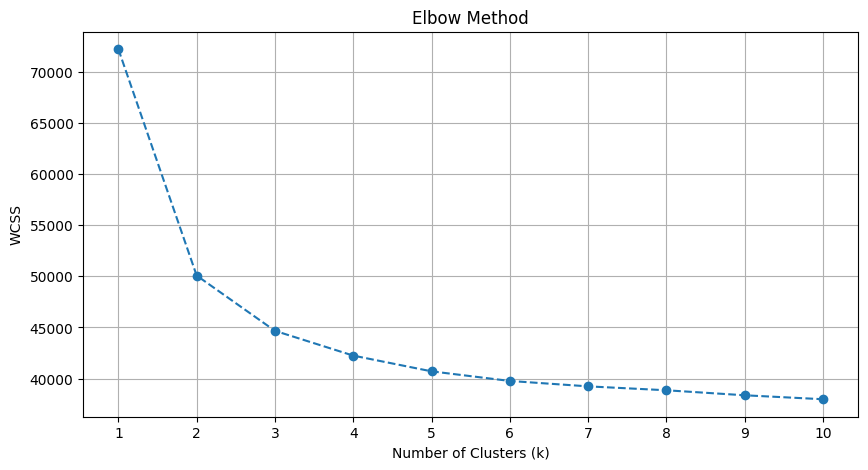

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [10]:
# Apply k-Means with the optimal number of clusters (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Display the first few rows with the new 'Cluster' column
display(df.head())

,Age,Gender,Years of Experience in Teaching,1.1. Inquiry-Based Learning,1.2. Project-Based Learning,1.3. Cooperative Learning,1.4. Direct Instruction,1.5. Contextualized and Local Teaching,2.1. Managing Disruptive Behavior,2.2. Establishing routines,...,12.2. Recognizing Teacher burnout,12.3. Wellness programs and mindfulness,12.4. Work-life balance strategies,12.5. Peer Support and mentoring,13.1. Curriculum mapping and alignment,13.2. Lesson Planning Techniques,13.3. Selecting appropriate instructional materials,13.4. Contextualization and indegenization,13.5. Spiral progression and integration,Cluster
0,19,2,0,4,5,4,5,5,3,5,...,4,3,4,3,4,3,4,3,4,3
1,19,2,0,4,5,4,5,5,4,5,...,4,5,4,5,4,5,4,5,4,2
2,19,2,0,4,5,4,5,5,4,5,...,4,5,4,5,4,5,4,5,4,2
3,19,2,0,4,5,4,5,4,5,4,...,5,5,4,5,4,5,4,5,4,2
4,20,2,0,3,2,3,2,3,3,3,...,4,3,3,3,3,5,5,4,3,1


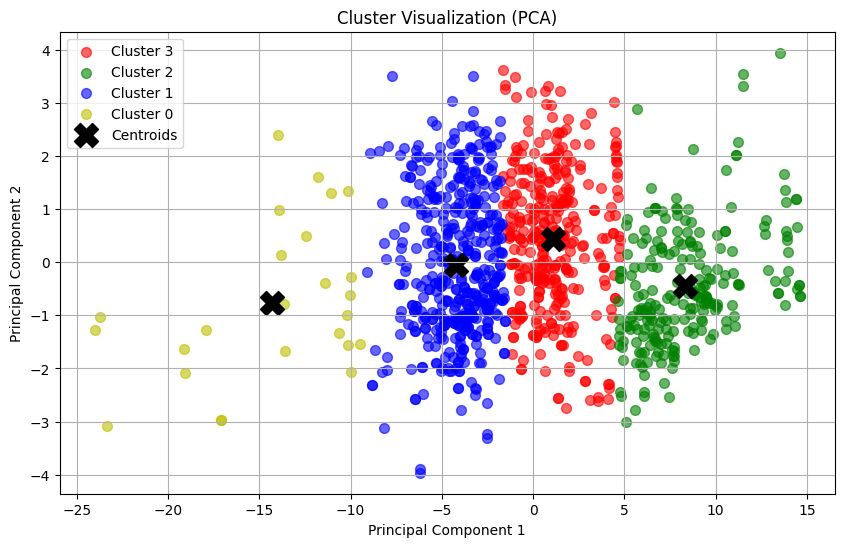

In [11]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

# Add cluster labels to the PCA DataFrame
principal_df['Cluster'] = clusters

# Get the centroids of the clusters in the PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Visualize the clusters and centroids
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y'] # Define colors for each cluster
for cluster_id, color in zip(principal_df['Cluster'].unique(), colors):
    plt.scatter(principal_df[principal_df['Cluster'] == cluster_id]['principal component 1'],
                principal_df[principal_df['Cluster'] == cluster_id]['principal component 2'],
                c=color,
                label=f'Cluster {cluster_id}',
                s=50, alpha=0.6)

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=300, c='black', marker='X', label='Centroids')

plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Interpret the clusters by examining the mean of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()

# Display the cluster means
display(cluster_means)

,Age,Gender,Years of Experience in Teaching,1.1. Inquiry-Based Learning,1.2. Project-Based Learning,1.3. Cooperative Learning,1.4. Direct Instruction,1.5. Contextualized and Local Teaching,2.1. Managing Disruptive Behavior,2.2. Establishing routines,...,12.1. Time and Stress Management,12.2. Recognizing Teacher burnout,12.3. Wellness programs and mindfulness,12.4. Work-life balance strategies,12.5. Peer Support and mentoring,13.1. Curriculum mapping and alignment,13.2. Lesson Planning Techniques,13.3. Selecting appropriate instructional materials,13.4. Contextualization and indegenization,13.5. Spiral progression and integration
Cluster,,,,,,,,,,,,,,,,,,,,,
0,38.560000,1.920000,13.800000,1.640000,2.160000,2.200000,2.040000,2.080000,2.200000,1.800000,...,2.360000,2.240000,2.080000,2.200000,2.240000,2.280000,2.120000,1.640000,1.960000,2.040000
1,37.512987,1.852814,12.545455,2.932900,3.045455,3.043290,3.112554,3.062771,3.034632,3.088745,...,3.114719,3.086580,3.114719,3.119048,3.119048,3.073593,3.062771,3.075758,3.060606,3.002165
2,26.891775,1.861472,3.818182,4.220779,4.233766,4.398268,4.406926,4.380952,4.255411,4.311688,...,4.411255,4.389610,4.411255,4.467532,4.471861,4.333333,4.350649,4.363636,4.389610,4.367965
3,37.180233,1.813953,12.534884,3.485465,3.558140,3.718023,3.726744,3.686047,3.578488,3.534884,...,3.633721,3.561047,3.665698,3.686047,3.671512,3.642442,3.572674,3.686047,3.654070,3.607558


In [14]:
# Save the DataFrame with cluster labels to a CSV file
df.to_csv('clustering_results.csv', index=False)

You can download the results [here](clustering_results.csv).